# 1. ОТЧЁТ МОДУЛЯ "A"

In [1]:
# Подключение необходжимых библиотек
import pandas as pd
from bs4 import BeautifulSoup as Soup
import requests

## 1.1 Парсинг данных

На основе имеющихся аналитических статей, связанных с информационными технологиями, бизнесом и интернетом на просторах ХАБР необходжимо собьрать данные. Для выполнения этой задачи, нужно создать парсер.

In [8]:
# Тетсовый парсер сайта
site_url = 'https://habr.com/ru/companies/vtb/profile/'
links = [site_url]

constructor = {
    'Название': [],
    'Рейтинг': [],
    'Описание': [],
    'Сфера деятельности': [],
    'Дата публрикации': []
}

for link in links:
    response = requests.get(link)
    soup = Soup(response.content, 'html.parser')
    items = soup.find_all('div', class_='pull-down')
    for item in items:
        title = item.find('a', class_='tm-company-card__name').text.strip()
        reiting = item.find('span', class_='tm-votes-lever__score-counter').text.strip()
        info = item.find('span', class_='tm-company-profile__content').text.strip()
        sfera = item.find('div', class_='tm-company-profile__categories').text.strip()
        datepub = item.find('dd', class_='tm-description-list__body').text.strip()
        constructor['Название'] += [title] 
        constructor['Рейтинг'] += [reiting] 
        constructor['Описание'] += [info] 
        constructor['Сфера деятельности'] += [sfera] 
        constructor['Дата публрикации'] += [datepub] 

pd.DataFrame(constructor).to_csv('./DataFrame.csv', encoding="utf-8", index=False)

In [9]:
# Присовение датафрейму вывода парсинга 
osnovadf = pd.read_csv('DataFrame.csv')

In [10]:
# Просмотр датафрейма
osnovadf

,Название,Рейтинг,Описание,Сфера деятельности,Дата публрикации
0,ВТБ,143.74,"Банк ВТБ — международная финансовая группа, пр...",Веб-разработка\n \n Пр...,Спонсор сезона machine learning ▇▅▄▅▅▄ ▇▄▅


In [11]:
# Заготовка полного парсера с перечнем сайтов
url_list = ['https://habr.com/ru/companies/avito/profile/', 'https://habr.com/ru/companies/vtb/profile/',
         'https://habr.com/ru/companies/vk/profile/', 'https://habr.com/ru/companies/vk/profile/']
i = 0
while i != len(url_list):
    site_url = url_list[i]
    links = [site_url]
            
    constructor = {
        'Название': [],
        'Рейтинг': [],
        'Описание': [],
        'Сфера деятельности': [],
        'Дата публрикации': []
    }
    for link in links:
        response = requests.get(link)
        soup = Soup(response.content, 'html.parser')
        items = soup.find_all('div', class_='pull-down')
        for item in items:
            title = item.find('a', class_='tm-company-card__name').text.strip()
            reiting = item.find('span', class_='tm-votes-lever__score-counter').text.strip()
            info = item.find('span', class_='tm-company-profile__content').text.strip()
            sfera = item.find('div', class_='tm-company-profile__categories').text.strip()
            datepub = item.find('dd', class_='tm-description-list__body tm-description-list__body tm-description-list__body_variant-columns-info').text.strip()
            constructor['Название'] += [title] 
            constructor['Рейтинг'] += [reiting] 
            constructor['Описание'] += [info] 
            constructor['Сфера деятельности'] += [sfera] 
            constructor['Дата публрикации'] += [datepub] 
        pd.DataFrame(constructor).to_csv('./DataFrame2.csv', encoding="utf-8", index=False)
        i += 1

In [12]:
# Второй датафрейм для проверки парсинга
povtordf = pd.read_csv('DataFrame2.csv')

In [13]:
# Просмотр датафрейма
povtordf

,Название,Рейтинг,Описание,Сфера деятельности,Дата публрикации
0,VK,4.68,"Строим сервисы, используя силу социальных сете...",Мобильные технологии\n \n ...,vk.com


# ОТЧЁТ  МОДУЛЯ "Б"

In [2]:
# Импорт датафрейма в переменную
BaseDF = pd.read_csv('BaseDataFrame.csv', header=None)
BaseDF = BaseDF.drop([0])
BaseDF.head()

,0,1,2,3,4,5
1,AvitoTech,Мы команда инженеров Авито. В блоге рассказыва...,192.81,Веб-разработка Электронная коммерция Веб-сервисы,27.05.16,Государство и Общество
2,ВТБ,"Банк ВТБ — международная финансовая группа, пр...",133.51,Веб-разработка Программное обеспечение Электро...,NaN,Государство и Общество
3,VK,"Строим сервисы, используя силу социальных сете...",894.70,Мобильные технологии Веб-сервисы Игры и развле...,\n09.07.08,Культурные проекты в сети
4,Альфа-Банк,"Alfa Digital – IT-подразделение Альфа-Банка, к...",190.11,Дизайн и юзабилити Электронная коммерция Мобил...,11.09.12,"Наука, технологии и инновации"
5,Лаборатория Касперского,«Лаборатория Касперского» — крупнейшая в мире ...,354.52,Программное обеспечение,\n08.08.08,"Наука, технологии и инновации"


In [3]:
# Присовение имен к столбцам
BaseDF.columns = ['Название', 'Описание','Рейтинг','Доп Атрибут', 'Дата публикации', 'Сфера']

In [4]:
BaseDF.head()

,Название,Описание,Рейтинг,Доп Атрибут,Дата публикации,Сфера
1,AvitoTech,Мы команда инженеров Авито. В блоге рассказыва...,192.81,Веб-разработка Электронная коммерция Веб-сервисы,27.05.16,Государство и Общество
2,ВТБ,"Банк ВТБ — международная финансовая группа, пр...",133.51,Веб-разработка Программное обеспечение Электро...,NaN,Государство и Общество
3,VK,"Строим сервисы, используя силу социальных сете...",894.70,Мобильные технологии Веб-сервисы Игры и развле...,\n09.07.08,Культурные проекты в сети
4,Альфа-Банк,"Alfa Digital – IT-подразделение Альфа-Банка, к...",190.11,Дизайн и юзабилити Электронная коммерция Мобил...,11.09.12,"Наука, технологии и инновации"
5,Лаборатория Касперского,«Лаборатория Касперского» — крупнейшая в мире ...,354.52,Программное обеспечение,\n08.08.08,"Наука, технологии и инновации"


In [5]:
# N-граммы — усточивые последовательности из N слов, идущих подряд
# Коллокация — устойчивое сочетание слов, не обязательно идущих подряд
# Биграммы – это два слова, часто встречающиеся в документе вместе. Триграммы – это 3 часто встречающихся слова вместе.

[Text(0, 0, 'AvitoTech'),
 Text(1, 0, 'ВТБ'),
 Text(2, 0, 'VK'),
 Text(3, 0, 'Альфа-Банк'),
 Text(4, 0, 'Лаборатория Касперского'),
 Text(5, 0, 'Росатом'),
 Text(6, 0, 'Ростелеком'),
 Text(7, 0, 'ИТМО'),
 Text(8, 0, 'СберМаркет'),
 Text(9, 0, 'AGIMA'),
 Text(10, 0, 'Московский кредитный банк'),
 Text(11, 0, 'Тензор')]

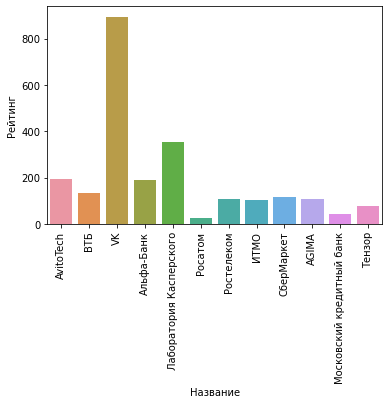

In [6]:
# Визуализация  рейтинга компаний
import seaborn as sns
graph = sns.barplot(data=BaseDF, x="Название", y="Рейтинг")
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)

In [7]:
# Преобразование сторлбца с датой публикации в во временной формат данных
BaseDF['Дата публикации'] = pd.to_datetime(BaseDF['Дата публикации'], infer_datetime_format=True)

In [8]:
# Проверка результата выполнения кода
datatypes = BaseDF.dtypes
datatypes

Название                   object
Описание                   object
Рейтинг                   float64
Доп Атрибут                object
Дата публикации    datetime64[ns]
Сфера                      object
dtype: object

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

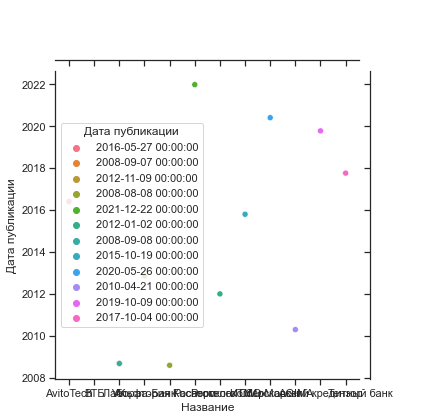

In [9]:
# Визуализация данных:  дата публикации компаний
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_theme(style="ticks")
grapgdate = sns.jointplot(data=BaseDF, x="Название", y="Дата публикации", color="#4CB391", hue=BaseDF['Дата публикации'] )
grapgdate.set_xticklabels(grapgdate.get_xticklabels(),rotation = 90)

# 3. ОТЧЁТ МОДЁЛЯ "B"

## 3.1 Разбиение выборки

### 3.1.1 Разбиение данных на обучающую и  тестирующую

Прежде чем мы начнем обучение модели, нужно разделить данные так. Чаще всего для обучения модели используется 80% информации (в зависимости от объема данных размер выборки может варьироваться) и 20% – для тестирования (проверки точности).

In [50]:
## Подкелючение библиотеки sklearn
from sklearn.model_selection import train_test_split

In [92]:
train, test = train_test_split(BaseDF, test_size = 0.2)

Примечание: Выбор разделения данных на обучающую и тестирующую стал в соотношении 80:20 исходя из закона **Парето**.
«Принцип дисбаланса» или «Правило 20/80». Так называют закономерность, которую вывел учёный. Она говорит о том, что 80% результатов достигается за счёт приложения 20% усилий и наоборот. Точнее, лучше сказать не про усилия, а про факторы, так как подобный дисбаланс наблюдается во всей живой природе и системах. Даже если процесс с виду автономный и не требует чьих-то усилий, вы найдете в нём пропорцию 20/80 или близкую.

### 3.1.2 Обучение модели

Обучение будет проходить методом классификация текстов.
**Классификация текстов** – метод машинного обучения, используемый для их фрагментации на категории

Подготовим файлы в формате .txt Содержание файла по умолчанию должно включать **label Сфера деятельности Название**

In [93]:
# Создадим текстовые файля для обучения модели с сферой и названием
with open('train.txt', 'w') as f:
    for each_text, each_label in zip(train['Название'], train['Сфера']):
        f.writelines(f'__label__{each_label} {each_text}\n')
        
with open('test.txt', 'w') as f:
    for each_text, each_label in zip(test['Название'], test['Сфера']):
        f.writelines(f'__label__{each_label} {each_text}\n')


Ниже представлен выводл получившегося результата в файлах train.txt и test.txt

In [94]:
!head -n 10 train.txt

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


Необходимо подключить библиотеку fastText – популярная библиотека с открытым исходным кодом для классификации текстов.

In [95]:
import fasttext

Для обучения модели необходимо задать fastText входной файл и ее имя:

In [96]:
# Первая модель без оптимизации гиперпараметров
model1 = fasttext.train_supervised('train.txt')

In [97]:
# Создадим функцую для отображения результатов обучения модели
def print_results(sample_size, precision, recall):
    precision   = round(precision, 2)
    recall      = round(recall, 2)
    print(f'{sample_size=}')
    print(f'{precision=}')
    print(f'{recall=}')

#### Функция позволит отобразить метрику обучения модели,  а именно:
- Sample size - Размер выборки
- Precision - Точность обучения
- Recall - Полноту обучения

In [98]:
# Применяем функцию
print_results(*model1.test('test.txt'))

sample_size=3
precision=0.67
recall=0.67


Сохраним результаты модели...

In [139]:
model1.save_model('Model1.model')

#### *Результаты, хотя и не идеальные, но выглядят многообещающими.*

Обучение методом классификация текстов показал превосходный результат обучения. Результат представлен в виде высокой точности и полноты данных обучения. Следовательно данный метод будет взят за основу обучения модели и последующей оптимизации, путём изменения гиперпараметров.

## 3.2 Оптимизация модели

### 3.2.1 Оптимизация гиперпараметров

Поиск наилучших гиперпараметров вручную может занять много времени. По умолчанию модель fastText во время обучения включает каждый обучающий пример только пять раз, что довольно мало. Количество просмотров каждого примера (также известное как количество эпох) может быть увеличено с помощью ручной оптимизации **epoch**

In [99]:
# Вторая модель с количеством эпох равной 25
model2 = fasttext.train_supervised('train.txt', epoch=25)

In [100]:
print_results(*model2.test('test.txt'))


sample_size=3
precision=0.67
recall=0.67


Как можно заметить, точность модели не возрасла. Еще один способ изменить скорость процесса – увеличить (или уменьшить) скорость обучения алгоритма. Это соответствует тому, насколько сильно меняется модель после обработки каждого примера. Скорость обучения равная 0 будет означать, что модель вообще не меняется и, следовательно, ничему не учится. Хорошие значения скорости обучения находятся в диапазоне 0.1 – 1.0. Также можно вручную оптимизировать этот гиперпараметр с помощью аргумента **lr**:

In [101]:
# Третья модель с количеством эпох равной 10 и скоростью обучния равной 1
model3 = fasttext.train_supervised('train.txt', epoch=10, lr=1.0)

In [102]:
print_results(*model3.test('test.txt'))

sample_size=3
precision=0.67
recall=0.67


Наконец, существует возможность улучшить производительность модели, используя биграммы слов, а не просто юниграммы. Это особенно значимо для задач классификации, где важен порядок слов. Для этого необходимо включить в модель аргумент **wordNgrams** равный 2.

In [103]:
# Четвёртая модель с аргументов wordNgrams = 2
model4 = fasttext.train_supervised('train.txt', epoch=10, lr=1.0, wordNgrams =2)

In [106]:
print_results(*model4.test('test.txt'))

sample_size=3
precision=0.67
recall=0.67


Функция автоматической настройки fastText позволяет оптимизировать гиперпараметры для получения наивысшего показателя. Для этого необходимо включить модель аргумент **autotuneValidationFile** и тестовый датасет:

In [107]:
model5 = fasttext.train_supervised('train.txt', autotuneValidationFile='test.txt')

In [109]:
print_results(*model5.test('test.txt'))

sample_size=3
precision=1.0
recall=1.0


### 3.2.2 Оценка оптимизации модели

Чтобы оценить модель после настройки гиперпараметров необходимо привести визуальное представление улучшение модели.

Для этого создадим отдельынй датафрейм с данными о изменении модели при настройке гиперпараметров:

In [135]:
df_resultmodelstatic = pd.DataFrame({'MODEL': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5'],
                                    'sample_size': [3, 3, 3, 3, 3],
                                    'precision': [0.68, 0.68, 0.68, 0.68, 1.0],
                                    'recall': [0.6, 0.6, 0.6, 0.6 , 1.0]})

In [136]:
df_resultmodelstatic

,MODEL,sample_size,precision,recall
0,Model1,3,0.68,0.6
1,Model2,3,0.68,0.6
2,Model3,3,0.68,0.6
3,Model4,3,0.68,0.6
4,Model5,3,1.00,1.0


Датафрейм получился информативно-конструктивным, следует визуализировать его:

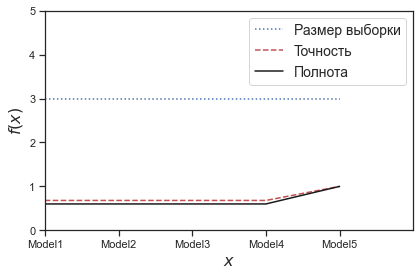

In [137]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
x = df_resultmodelstatic.MODEL

# указываем в аргументе label содержание легенды 
plt.plot(x, df_resultmodelstatic.sample_size, ':b', label='Размер выборки')
plt.plot(x, df_resultmodelstatic.precision, '--r', label='Точность')
plt.plot(x, df_resultmodelstatic.recall, 'k', label='Полнота')

plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$f(x)$', fontsize=16)

plt.xlim([0, 5])
plt.ylim([0, 5])

# выводим легенду
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

#### Настройка гиперпараметров привела у улучшению качества модели. Модель №5 с быстрой скоростью справляется с поставленной задачей, она показала лучшее качество обучение!

Сохраним результаты модели и создадим функцию для классификации новых данных

In [140]:
model5.save_model('OptimizedModel.model')

**fastText** также способен сжимать модель, чтобы получить файл гораздо меньшего размера, жертвуя лишь небольшой производительностью за счет количественной оценки.

In [142]:
model5.quantize(input='train.txt', retrain=True)

In [143]:
print_results(*model5.test('test.txt'))

sample_size=3
precision=1.0
recall=1.0


Сохраним сжатую модель...

In [144]:
model5.save_model('ZjataiadModel.model')

### 3.2.3 Проверка работы модели

Можно проверить результаты на новых данных, введя примерную сферу:

In [155]:
# Импортируем и преобразуем fasttext, чтобы команда fasttext.load_model сработала
import fasttext
fasttext.FastText.eprint = lambda x: None
# Загружаем, сохраненную ранее модель
model_test = fasttext.load_model("OptimizedModel.model")

In [ ]:
# Пример классификации
model.predict("...Ввести сюда...")